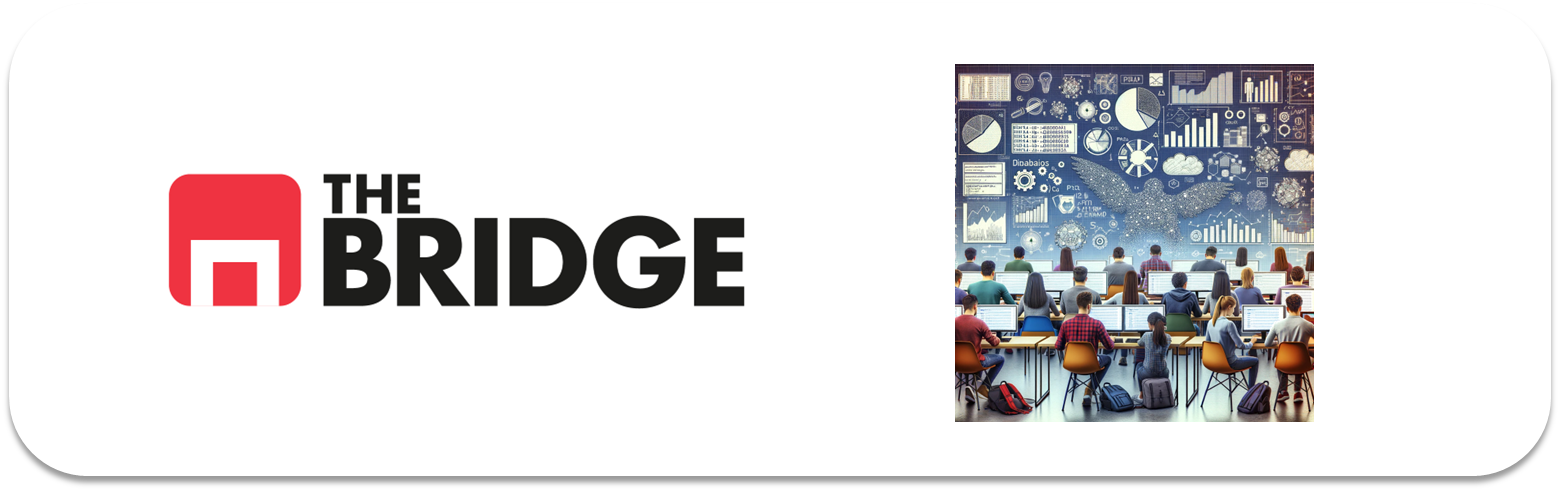

## PRACTICA OBLIGATORIA: **Clasificacion y Regresion Logistica**

* La práctica obligatoria de esta unidad consiste en modelar la supervivencia en el Titanic, por fin, además de una parte adicional multiclase. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión logística, evaluarlo contra un dataset de test reservado del original mostrando las métricas propias de los problemas de clasificación, la matriz de confusión y la curva ROC. Además se pide comparar las predicciones con los valores reales y al final adaptar el modelo a un problema multiclase.

Los pasos para guiar el trabajo:
1. Carga el dataset del Titanic. 
2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.
3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.
4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.
5. Construye las parejas X,y de train y test.
6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.
7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
8. Trata las variables para que funcionen lo mejor posible en el modelo.
9. Construye un modelo de regresión logística.
10. EXTRA: Analiza si lo crees conveniente los pesos y la importancia de las features.
11. Procesa el dataset de Test para que puedas usarlo en la evaluación 
12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.
13. EXTRA: Halla la probabilidad de supervivencia de un hombre de entre 30 y 40 años, que embarcó en Southampton en segunda clase, viajaba solo y no pagó el billete. PISTA: En este caso tendrás que calcular varias probabilidades y hacer la media de ellas.
14. EXTRA: Aprovecha todo el trabajo haciendo un único cambio en el target, ahora será la clase del viajero. Cambia el target quitándolo de X_train, X_test y añade a estos el target anterior. El resto no deberías cambiarlo. Entrena y evalua el modelo sólo con el classification_report.  



1. Carga el dataset del Titanic. 

In [32]:
# Cargar el dataset
titanic_df = pd.read_csv("C:/Users/migue/Documents/GitHub/ONLINE_DS_THEBRIDGE_Miguel_repo_test/Sprint_10/Unidad_02/Practica_Obligatoria/data/titanic.csv")

# Realizar una copia del dataset original
titanic_copy = titanic_df.copy()

# Mostrar las primeras filas para verificar la carga
print(titanic_copy.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


2. Deshazte de las variables que no vayas a usar. Limpia lo que creas necesarios pero no hagas imputaciones.

In [33]:
for column in titanic_copy.columns:
    print(f"\nColumna: {column}")
    print(f"Valores únicos: {titanic_copy[column].unique()[:10]}")  # Mostrar solo los primeros 10 valores únicos
    print(f"Cantidad de valores únicos: {titanic_copy[column].nunique()}")
    print(f"Cantidad de valores nulos: {titanic_copy[column].isnull().sum()}")


Columna: survived
Valores únicos: [0 1]
Cantidad de valores únicos: 2
Cantidad de valores nulos: 0

Columna: pclass
Valores únicos: [3 1 2]
Cantidad de valores únicos: 3
Cantidad de valores nulos: 0

Columna: sex
Valores únicos: ['male' 'female']
Cantidad de valores únicos: 2
Cantidad de valores nulos: 0

Columna: age
Valores únicos: [22. 38. 26. 35. nan 54.  2. 27. 14.  4.]
Cantidad de valores únicos: 88
Cantidad de valores nulos: 177

Columna: sibsp
Valores únicos: [1 0 3 4 2 5 8]
Cantidad de valores únicos: 7
Cantidad de valores nulos: 0

Columna: parch
Valores únicos: [0 1 2 5 3 4 6]
Cantidad de valores únicos: 7
Cantidad de valores nulos: 0

Columna: fare
Valores únicos: [ 7.25   71.2833  7.925  53.1     8.05    8.4583 51.8625 21.075  11.1333
 30.0708]
Cantidad de valores únicos: 248
Cantidad de valores nulos: 0

Columna: embarked
Valores únicos: ['S' 'C' 'Q' nan]
Cantidad de valores únicos: 3
Cantidad de valores nulos: 2

Columna: class
Valores únicos: ['Third' 'First' 'Second']

las columnas se eliminaran porque:

- deck: Demasiados valores nulos.
- alive: Redundante con survived.
- who, class, adult_male, alone: Información derivada de otras columnas (sex, age, pclass, sibsp, parch).

In [34]:
# Eliminar columnas irrelevantes
columns_to_drop = ['deck', 'alive', 'who', 'class', 'adult_male', 'alone']
titanic_copy = titanic_copy.drop(columns=columns_to_drop)

# Mostrar las primeras filas para verificar
print(titanic_copy.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  embark_town
0         0       3    male  22.0      1      0   7.2500        S  Southampton
1         1       1  female  38.0      1      0  71.2833        C    Cherbourg
2         1       3  female  26.0      0      0   7.9250        S  Southampton
3         1       1  female  35.0      1      0  53.1000        S  Southampton
4         0       3    male  35.0      0      0   8.0500        S  Southampton


3. Escoge y analiza la variable target de forma gráfica y razona sobre el impacto de la distribución en los resultados esperados. Ten en cuenta que lo que queremos es poder predecir si un pasajero sobrevivirá.

In [35]:
# Definir las características (X) y la variable objetivo (y)
X = titanic_copy.drop(columns=['survived'])
y = titanic_copy['survived']

# División en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verificar la distribución de clases en ambos conjuntos
print("Distribución en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True) * 100)
print("\nDistribución en el conjunto de prueba:")
print(y_test.value_counts(normalize=True) * 100)

Distribución en el conjunto de entrenamiento:
survived
0    61.637239
1    38.362761
Name: proportion, dtype: float64

Distribución en el conjunto de prueba:
survived
0    61.567164
1    38.432836
Name: proportion, dtype: float64


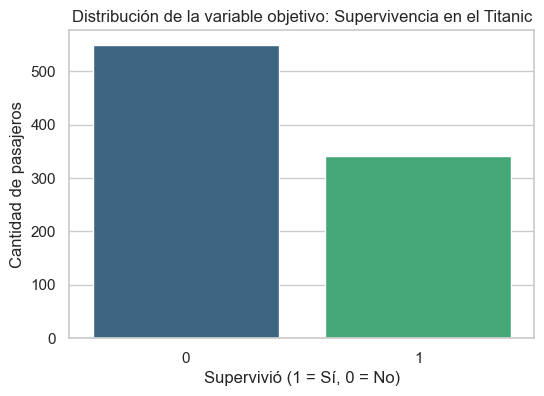

In [8]:
sns.set(style="whitegrid")

# Gráfico de barras para la variable objetivo 'survived' sin advertencia
plt.figure(figsize=(6,4))
sns.countplot(x='survived', data=titanic_copy, hue='survived', palette='viridis', legend=False)
plt.title('Distribución de la variable objetivo: Supervivencia en el Titanic')
plt.xlabel('Supervivió (1 = Sí, 0 = No)')
plt.ylabel('Cantidad de pasajeros')
plt.show()


El gráfico muestra que aproximadamente el 61.6% de los pasajeros no sobrevivieron, mientras que el 38.4% sí lo hicieron.

4. Haz el split en train y test que creas conveniente pero asegurándote que ambos conjuntos tienen un reparto similar de pasajeros embarcados en las tres ciudades.

In [36]:
titanic_cleaned = titanic_copy.dropna(subset=['embarked'])

# Definir características y target
X = titanic_cleaned.drop(columns=['survived'])
y = titanic_cleaned['survived']

# Realizar el split estratificando por 'embarked'
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=titanic_cleaned['embarked'])

# Verificar la distribución de embarques
train_embarked_distribution = X_train['embarked'].value_counts(normalize=True) * 100
test_embarked_distribution = X_test['embarked'].value_counts(normalize=True) * 100

train_embarked_distribution, test_embarked_distribution

(embarked
 S    72.508039
 C    18.810289
 Q     8.681672
 Name: proportion, dtype: float64,
 embarked
 S    72.284644
 C    19.101124
 Q     8.614232
 Name: proportion, dtype: float64)

5. Construye las parejas X,y de train y test.

In [37]:
# Definir las características (X) y la variable objetivo (y)
X = titanic_cleaned.drop(columns=['survived'])
y = titanic_cleaned['survived']

# Realizar la división en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Confirmar la cantidad de datos en cada conjunto
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (622, 8)
Tamaño de X_test: (267, 8)
Tamaño de y_train: (622,)
Tamaño de y_test: (267,)


6. Ahora sí imputa los nulos con medias y modas en la X de train. Guarda esas medias que necesitarás en la parte de test.

In [38]:
# Eliminar filas con valores nulos en 'embarked'
titanic_cleaned = titanic_copy.dropna(subset=['embarked'])

# Definir características (X) y variable objetivo (y)
X = titanic_cleaned.drop(columns=['survived'])
y = titanic_cleaned['survived']

# Realizar el split con estratificación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Imputación de valores nulos con medias y modas en X_train
mean_values = X_train.mean(numeric_only=True)  # Media para columnas numéricas
mode_values = X_train.mode().iloc[0]           # Moda para columnas categóricas

# Aplicar la imputación en X_train
X_train = X_train.fillna(mean_values).fillna(mode_values)

# Guardar las medias y modas para luego usar en test
saved_imputations = {
    "mean": mean_values,
    "mode": mode_values
}

# Aplicar en X_test
X_test = X_test.fillna(saved_imputations['mean']).fillna(saved_imputations['mode'])

# Ver
print("Primeras filas del conjunto de entrenamiento:")
print(X_train.head())

print("\nPrimeras filas del conjunto de prueba:")
print(X_test.head())


Primeras filas del conjunto de entrenamiento:
     pclass     sex        age  sibsp  parch     fare embarked  embark_town
748       1    male  19.000000      1      0  53.1000        S  Southampton
45        3    male  30.553876      0      0   8.0500        S  Southampton
28        3  female  30.553876      0      0   7.8792        Q   Queenstown
633       1    male  30.553876      0      0   0.0000        S  Southampton
403       3    male  28.000000      1      0  15.8500        S  Southampton

Primeras filas del conjunto de prueba:
     pclass     sex   age  sibsp  parch     fare embarked  embark_town
879       1  female  56.0      0      1  83.1583        C    Cherbourg
684       2    male  60.0      1      1  39.0000        S  Southampton
824       3    male   2.0      4      1  39.6875        S  Southampton
323       2  female  22.0      1      1  29.0000        S  Southampton
486       1  female  35.0      1      0  90.0000        S  Southampton


7. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.

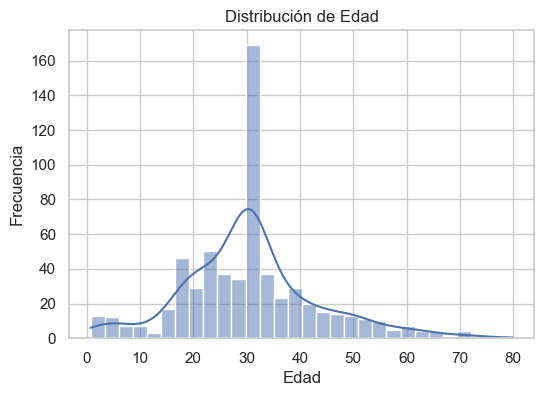

In [ ]:
# Gráfico de distribución de edad
plt.figure(figsize=(6,4))
sns.histplot(X_train['age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

Edad (age):

- La mayoría de los pasajeros tiene entre 20 y 40 años.
- La variable es continua y muestra una distribución normal con ligeras colas.

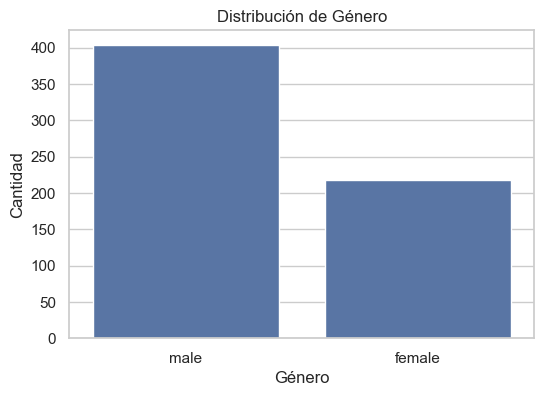

In [40]:
# Gráfico de distribución de género
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=X_train)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Género (sex):

- Hay más hombres que mujeres.
- El género parece ser un factor clave para la supervivencia, ya que se sabe históricamente que las mujeres tenían mayores probabilidades de ser rescatadas.

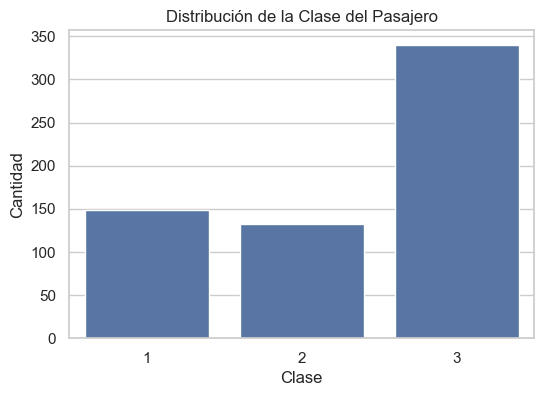

In [41]:
# Gráfico de la clase del pasajero
plt.figure(figsize=(6,4))
sns.countplot(x='pclass', data=X_train)
plt.title('Distribución de la Clase del Pasajero')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.show()

Clase del pasajero (pclass):

- La mayoría de los pasajeros viajaban en tercera clase.
- Es relevante ya que los pasajeros de primera clase tenían mayor probabilidad de supervivencia.

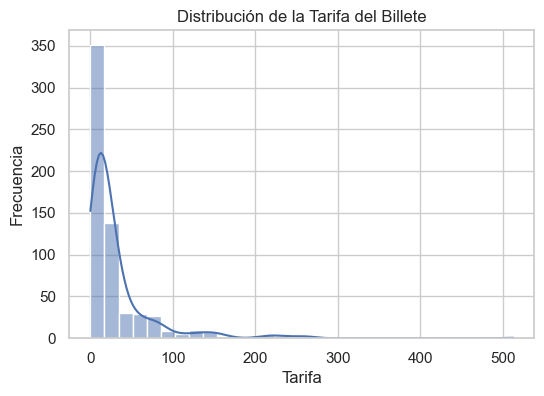

In [42]:
# Gráfico de la tarifa
plt.figure(figsize=(6,4))
sns.histplot(X_train['fare'], bins=30, kde=True)
plt.title('Distribución de la Tarifa del Billete')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

Tarifa (fare):

- Distribución altamente sesgada con valores extremos.
- Podría ser útil, pero necesita normalización debido a su sesgo.

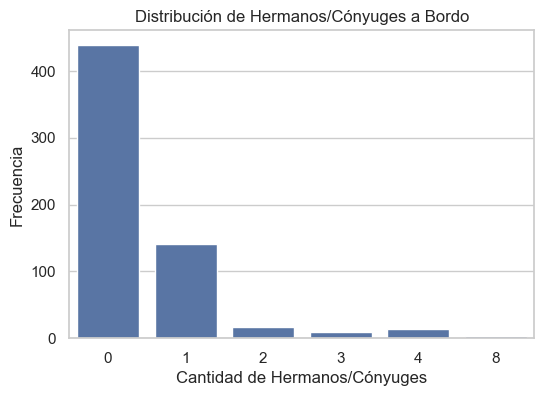

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(x='sibsp', data=X_train)
plt.title('Distribución de Hermanos/Cónyuges a Bordo')
plt.xlabel('Cantidad de Hermanos/Cónyuges')
plt.ylabel('Frecuencia')
plt.show()

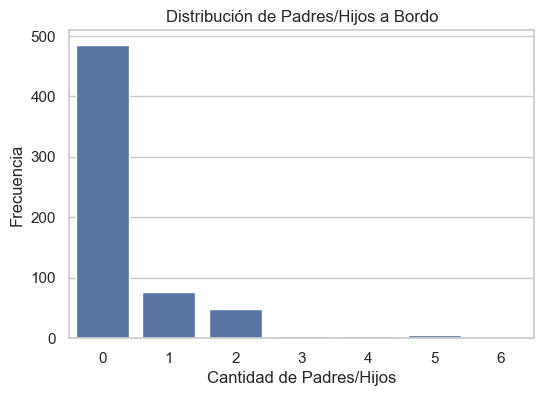

In [44]:
plt.figure(figsize=(6,4))
sns.countplot(x='parch', data=X_train)
plt.title('Distribución de Padres/Hijos a Bordo')
plt.xlabel('Cantidad de Padres/Hijos')
plt.ylabel('Frecuencia')
plt.show()

Número de familiares a bordo (sibsp, parch):

- La mayoría de los pasajeros viajaban solos o con una o dos personas.
- Puede ser importante, ya que viajar en familia podría haber influido en la supervivencia.

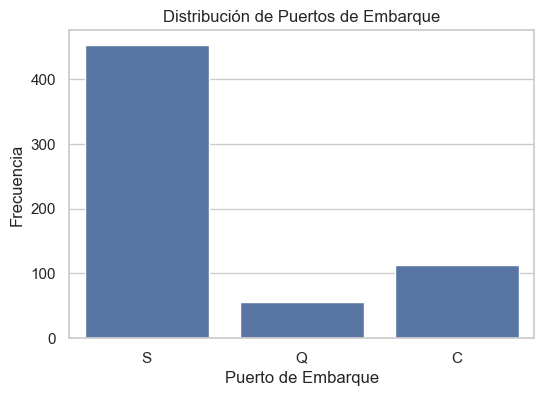

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='embarked', data=X_train)
plt.title('Distribución de Puertos de Embarque')
plt.xlabel('Puerto de Embarque')
plt.ylabel('Frecuencia')
plt.show()

Embarque (embarked):

- Mayoría de pasajeros embarcados en Southampton.
- Menor influencia que otras variables, pero aún útil para el modelo.

8. Trata las variables para que funcionen lo mejor posible en el modelo.

In [46]:
# Confirmar la estructura final
print("Columnas restantes en X_train:", X_train.columns)
print("Columnas restantes en X_test:", X_test.columns)

X_train.head()

Columnas restantes en X_train: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'embark_town'],
      dtype='object')
Columnas restantes en X_test: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'embark_town'],
      dtype='object')


,pclass,sex,age,sibsp,parch,fare,embarked,embark_town
748,1,male,19.000000,1,0,53.1000,S,Southampton
45,3,male,30.553876,0,0,8.0500,S,Southampton
28,3,female,30.553876,0,0,7.8792,Q,Queenstown
633,1,male,30.553876,0,0,0.0000,S,Southampton
403,3,male,28.000000,1,0,15.8500,S,Southampton


In [47]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,embark_town
879,1,female,56.0,0,1,83.1583,C,Cherbourg
684,2,male,60.0,1,1,39.0000,S,Southampton
824,3,male,2.0,4,1,39.6875,S,Southampton
323,2,female,22.0,1,1,29.0000,S,Southampton
486,1,female,35.0,1,0,90.0000,S,Southampton


In [48]:
# Convertir 'sex' a numérico
X_train['sex'] = X_train['sex'].map({'female': 0, 'male': 1})
X_test['sex'] = X_test['sex'].map({'female': 0, 'male': 1})

# Convertir 'embarked' a variables dummy manteniendo todas las columnas
X_train = pd.get_dummies(X_train, columns=['embarked'])
X_test = pd.get_dummies(X_test, columns=['embarked'])

# Eliminar la columna 'embark_town' por redundante
X_train = X_train.drop(columns=['embark_town'])
X_test = X_test.drop(columns=['embark_town'])

# Ver la estructura final
print("Columnas finales en X_train:", X_train.columns)
print("Columnas finales en X_test:", X_test.columns)
X_train.head(), X_test.head()

Columnas finales en X_train: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')
Columnas finales en X_test: Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked_C',
       'embarked_Q', 'embarked_S'],
      dtype='object')


(     pclass  sex        age  sibsp  parch     fare  embarked_C  embarked_Q  \
 748       1    1  19.000000      1      0  53.1000       False       False   
 45        3    1  30.553876      0      0   8.0500       False       False   
 28        3    0  30.553876      0      0   7.8792       False        True   
 633       1    1  30.553876      0      0   0.0000       False       False   
 403       3    1  28.000000      1      0  15.8500       False       False   
 
      embarked_S  
 748        True  
 45         True  
 28        False  
 633        True  
 403        True  ,
      pclass  sex   age  sibsp  parch     fare  embarked_C  embarked_Q  \
 879       1    0  56.0      0      1  83.1583        True       False   
 684       2    1  60.0      1      1  39.0000       False       False   
 824       3    1   2.0      4      1  39.6875       False       False   
 323       2    0  22.0      1      1  29.0000       False       False   
 486       1    0  35.0      1      0  

9. Construye un modelo de regresión logística.

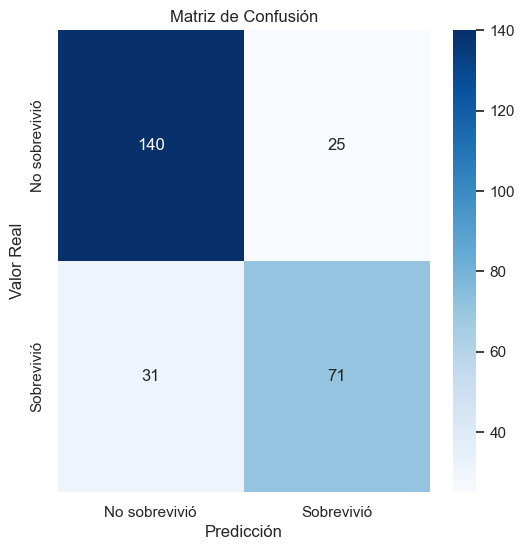

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Crear y entrenar el modelo de regresión logística
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Realizar predicciones
y_test_pred = log_reg_model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No sobrevivió', 'Sobrevivió'], yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

- 140 verdaderos negativos (predijo correctamente que no sobrevivió).
- 71 verdaderos positivos (predijo correctamente que sobrevivió).
- 25 falsos positivos.
- 31 falsos negativos.

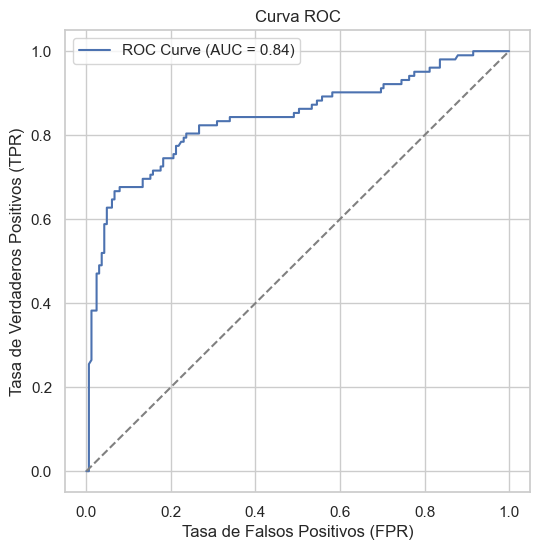

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular las probabilidades de predicción
y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

11. Procesa el dataset de Test para que puedas usarlo en la evaluación 

In [54]:
# Cargar el dataset de test original
titanic_test = titanic_df.copy()  

# Eliminar columnas irrelevantes
columns_to_drop = ['class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']
titanic_test = titanic_test.drop(columns=columns_to_drop)

# Convertir la variable 'sex' a numérica
titanic_test['sex'] = titanic_test['sex'].map({'female': 0, 'male': 1})

# Convertir 'embarked' a variables dummy
titanic_test = pd.get_dummies(titanic_test, columns=['embarked'])

# Imputar valores nulos con las medias y modas ya calculadas
titanic_test = titanic_test.fillna(saved_imputations['mean']).fillna(saved_imputations['mode'])

# Confirmar la estructura final del dataset de test
print("Columnas finales en el dataset de Test:")
print(titanic_test.columns)
titanic_test.head()

Columnas finales en el dataset de Test:
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,True
1,1,1,0,38.0,1,0,71.2833,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,True


12. Evalúa tu modelo contra el dataset de test y train. Obten las matrices de confusión y las métricas que creas adecuadas. Haz un pequeño assesment de su generabilidad.

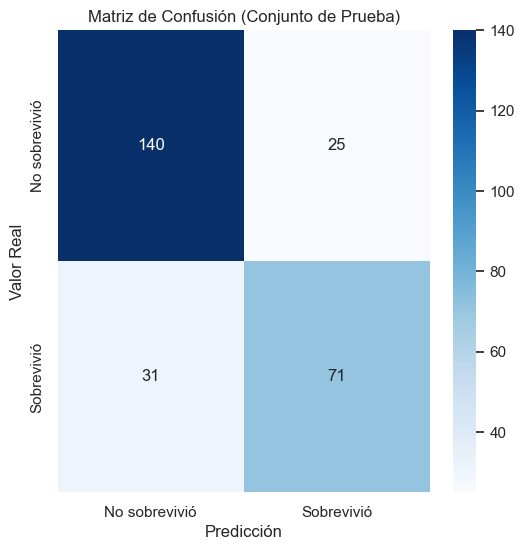

In [56]:
# Calcular la matriz de confusión para el conjunto de prueba
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", 
            xticklabels=['No sobrevivió', 'Sobrevivió'], 
            yticklabels=['No sobrevivió', 'Sobrevivió'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Conjunto de Prueba)')
plt.show()

- Verdaderos negativos (TN): 140
- Falsos positivos (FP): 25
- Falsos negativos (FN): 31
- Verdaderos positivos (TP): 71

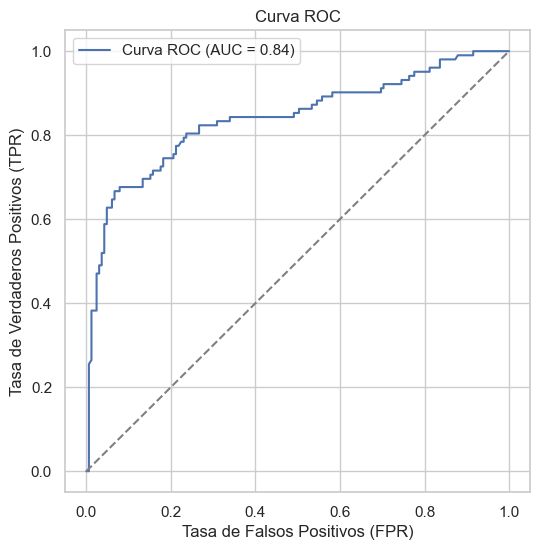

In [57]:
# Calcular las probabilidades de predicción (necesario para la curva ROC)
y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]

# Calcular los valores para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)

# Graficar la curva ROC
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend()
plt.show()

- Consistencia: La precisión en entrenamiento y prueba es similar (80% vs. 79%), lo que indica un buen ajuste del modelo sin sobreajuste evidente.

Desempeño en Clases:
- La clase 0 (no sobrevivió) tiene un mejor desempeño general con un recall alto.
- La clase 1 (sobrevivió) tiene un menor desempeño en recall y precision.
- Balance de Clases: El modelo predice con mayor facilidad a los pasajeros que no sobrevivieron, lo que podría indicar un ligero desbalance de clases.